### Problem Statement:
    Process the article and extract most frequent words and expain their usage in the article. Test for the sentiment of the article and extract positive words and negative wods in the article

In [1]:
# importing required libraries
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

###### Scraping the content of the article from the website

In [2]:
page = requests.get('https://hbr.org/2019/12/how-india-plans-to-protect-consumer-data')

In [3]:
soup = BeautifulSoup(page.content,'html.parser')

In [4]:
t = soup.find_all('p')

In [5]:
text=[]
for i in t:
    text.append(i.get_text())
print(text)

['India looks set to legislate a Personal Data Protection Bill (DPB), which would control the collection, processing, storage, usage, transfer, protection, and disclosure of personal data of Indian residents. There are a number of features of the DPB that will require companies to change their business models, practices, and principles. The issues raised here serve as a primer for what businesses need to keep in mind about India’s new regulation and the increase in data protection regulation around the world.', 'The Indian government looks set to legislate a Personal Data Protection Bill (DPB), which would control the collection, processing, storage, usage, transfer, protection, and disclosure of personal data of Indian residents. Despite its regional nature, DPB is an important development for global managers. The digital economy in India is expected to reach a valuation of $1 trillion dollars by 2022 — and it will attract numerous global players who must comply with DPB.', 'India has

We extracted the text of the article. Now lets see what about is our article and further process it.

##### Article Summary:    
    The article is about the Personal data protection bill and its objectives on how to protect data relating to individuals and the types of data involved and the way they are put into use , the security concerns that come with it and regulations on how and where its supposed to be stored. This bill will make sure the information is used fairly , lawfully and transparently following strict rules called  ‘data protection principles’. It applies to all companies processing personal data.

Now we join the whole article into one and then remove any special characters, white or wide spaces using regex and convert the whole text into lower case.

In [6]:
tx = ' '.join(str(i) for i in text)

In [7]:
# remove special characters and white spaces using 're'
stripped_text = re.sub('[^a-zA-Z\s]','',tx)
# removing white spaces
stripped_text = re.sub('\s+',' ',stripped_text)
# remove start and end spaces and convert all text to lower case
stripped = stripped_text.strip()
#convertig to lower case
stripped = stripped.lower()
stripped

'india looks set to legislate a personal data protection bill dpb which would control the collection processing storage usage transfer protection and disclosure of personal data of indian residents there are a number of features of the dpb that will require companies to change their business models practices and principles the issues raised here serve as a primer for what businesses need to keep in mind about indias new regulation and the increase in data protection regulation around the world the indian government looks set to legislate a personal data protection bill dpb which would control the collection processing storage usage transfer protection and disclosure of personal data of indian residents despite its regional nature dpb is an important development for global managers the digital economy in india is expected to reach a valuation of trillion dollars by and it will attract numerous global players who must comply with dpb india has followed the eus general data protection reg

We now tokenize our text into sentences, remove all stopwords from them and lemmatize each word. 

-Tokenzation means splitting entire document into samller units called tokens
-Stopwords are nothing but commonly used words which doesnt add meaning to the document.
-Lemmatization means extracting the base dictionary word by removing inflectional endings. 

In [8]:
txt=sent_tokenize(stripped)

In [33]:
# remove stopwords and lemmatizing at once 
new_sw=[]
corpus=[]

wc = WordNetLemmatizer()
sw = stopwords.words('english')
nsw=["not","couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn',
     "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
     'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

for word in sw:
    if(word not in nsw):
        new_sw.append(word)
for i in txt:
    if i not in new_sw:
        corpus.append(wc.lemmatize(i))

Visualising words using Word Cloud

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud()

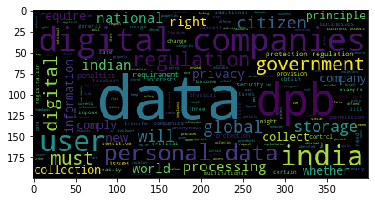

In [22]:
# word cloud for all words
img = wc.generate(corpus[0])
plt.imshow(img)

This article is about government introducing dpb(data protection bill) for protecting user data in India from digital companies with some regulations, which is why the terms data, dpb, digital companies, regulations, user, personal data, india are mostly used.

In [12]:
# 3_grams
count_vectorizer = CountVectorizer(ngram_range=(3,3)) 
X1 = count_vectorizer.fit_transform(corpus)  
cv_scores = X1.toarray()
features = count_vectorizer.get_feature_names()


tfidf_vectorizer = TfidfVectorizer(ngram_range=(3,3))
X2 = tfidf_vectorizer.fit_transform(corpus) 
tf_scores = (X2.toarray()) 


feat3 = []
cv3 = []
tf3 = []
for i,j,k in zip(tf_scores[0],features,cv_scores[0]):
    tf3.append(i)
    feat3.append(j)
    cv3.append(k)
ngram_3 = pd.DataFrame()
ngram_3['Features'] = feat3
ngram_3['CountVect_Scores'] = cv3
ngram_3['Tfidf_Scores'] = tf3
n3 = ngram_3.sort_values('Tfidf_Scores',ascending = False).head(10)
n3

Features  CountVect_Scores  Tfidf_Scores
379   data protection regulation                 4      0.091074
1398             to change their                 3      0.068305
924             of personal data                 3      0.068305
1117          regulation and the                 3      0.068305
1560               would have to                 3      0.068305
1337       their business models                 3      0.068305
1345         their personal data                 3      0.068305
1400              to comply with                 3      0.068305
183               bill dpb which                 2      0.045537
643                here serve as                 2      0.045537

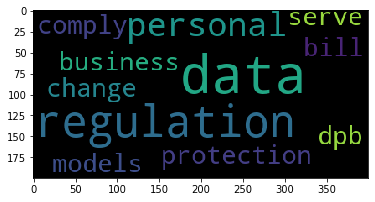

In [13]:
# word cloud for features of tri-grams
d = ' '.join(n3['Features'])

wc_img = wc.generate(d)
plt.imshow(wc_img)

This article depicts the safer and secure aspects that come into implementation by dpb to all digital companies that feed on user personal data , thus the terms data regulation protection, business models , personal data, bill dpb are used more.

In [14]:
# 2_grams
vectorizer = CountVectorizer(ngram_range=(2,2)) 
X1 = vectorizer.fit_transform(corpus)  
cv_scores = X1.toarray()
features = vectorizer.get_feature_names()

vectorizer = TfidfVectorizer(ngram_range=(2,2))
X2 = vectorizer.fit_transform(corpus) 
tf_scores = (X2.toarray()) 

feat2 = []
cv2 = []
tf2 = []
for i,j,k in zip(tf_scores[0],features,cv_scores[0]):
    tf2.append(i)
    feat2.append(j)
    cv2.append(k)
ngram_2 = pd.DataFrame()
ngram_2['Features'] = feat2
ngram_2['CountVect_Scores'] = cv2
ngram_2['Tfidf_Scores'] = tf2
n2 = ngram_2.sort_values('Tfidf_Scores',ascending = False).head(10)
n2

Features  CountVect_Scores  Tfidf_Scores
373   digital companies                19      0.344942
887       personal data                13      0.236013
817              of the                 9      0.163393
337     data protection                 7      0.127084
556             have to                 6      0.108929
1136     the government                 6      0.108929
818            of their                 6      0.108929
800             of data                 5      0.090774
276         comply with                 5      0.090774
1125           the data                 5      0.090774

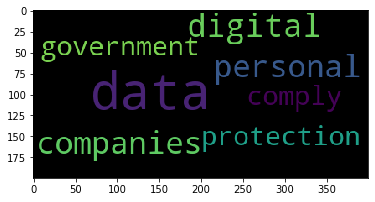

In [15]:
# word cloud for features of bi-grams
data = ' '.join(n2['Features'])
wc_img = wc.generate(data)
plt.imshow(wc_img)

This article is about the digital companies using the personal data to benefit their market  and government bringing out the privacy model and making sure they comply with the regulations. That is why the terms digital companies, personal daata, data protection, government, comply are repeated.


## Sentiment Analysis

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [17]:
vader = SentimentIntensityAnalyzer()

positive sentiment : (compound score >= 0.05)

neutral sentiment : (compound score > -0.05) and (compound score < 0.05)

negative sentiment : (compound score <= -0.05)

In [18]:
pos_senti = []
neg_senti = []
neu_senti = []
for i in text:
    sc = vader.polarity_scores(i)
    if sc['compound'] >= 0.05:
        #print("\n\nText: \n",i)
        print('\n Sentiment Score: \n',sc)
        print('\n The above Sentence has Positive Sentiment')
        pos_senti.append(i)
    elif sc['compound'] <= -0.05:
        #print("\n\nText: \n",i)
        print('\n Sentiment Score: \n',sc)
        print('\n The above Sentence has Negative Sentiment')
        neg_senti.append(i)
    else:
        #print("\n\nText: \n",i)
        print('\n Sentiment Score: \n',sc)
        print('\n The above Sentence has Neutral Sentiment')
        neu_senti.append(i)


 Sentiment Score: 
 {'neg': 0.0, 'neu': 0.956, 'pos': 0.044, 'compound': 0.3818}

 The above Sentence has Positive Sentiment

 Sentiment Score: 
 {'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'compound': 0.5267}

 The above Sentence has Positive Sentiment

 Sentiment Score: 
 {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.9313}

 The above Sentence has Positive Sentiment

 Sentiment Score: 
 {'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.7506}

 The above Sentence has Positive Sentiment

 Sentiment Score: 
 {'neg': 0.047, 'neu': 0.826, 'pos': 0.128, 'compound': 0.8674}

 The above Sentence has Positive Sentiment

 Sentiment Score: 
 {'neg': 0.009, 'neu': 0.913, 'pos': 0.079, 'compound': 0.8779}

 The above Sentence has Positive Sentiment

 Sentiment Score: 
 {'neg': 0.041, 'neu': 0.938, 'pos': 0.021, 'compound': -0.3976}

 The above Sentence has Negative Sentiment

 Sentiment Score: 
 {'neg': 0.018, 'neu': 0.948, 'pos': 0.034, 'compound': 0.1154}

 The above Sentence has Po

###### Out of 17 documents we got 11 are with positive sentiment and 6 are with negative sentiment.

In [19]:
senti = vader.polarity_scores(corpus)
print(senti)

{'neg': 0.056, 'neu': 0.86, 'pos': 0.085, 'compound': 0.9883}


###### Overall article has a positive sentiment with 86% of neutral words

In [40]:
words = corpus[0].split()
pos_senti = []
neg_senti = []
neu_senti = []
for word in words:
    sc = vader.polarity_scores(word)
    if sc['compound'] >= 0.05:
        pos_senti.append(word)
    elif sc['compound'] <= -0.05:
        neg_senti.append(word)
    else:
        neu_senti.append(word)

In [41]:
len(pos_senti),len(neg_senti),len(neu_senti)

(63, 34, 1624)

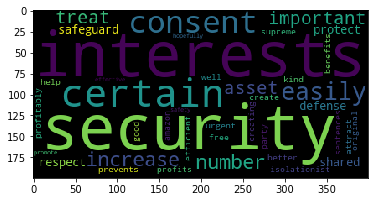

In [46]:
# word cloud for positive words
wc = WordCloud()
pos_words = ' '.join(pos_senti)
wc_pos = wc.generate(pos_words)
plt.imshow(wc_pos)

This bill has the ability to control misuse of data and considers users priorities and insecurities.
So it includes necessary steps to ensure that access to all sorts of personal data will be enclosed to market aimers with severe guidelines that every data using company must abide. Hence the terms , interest, security, consent , certain, important, safeguard, protect are considered as positive words wrt to article.

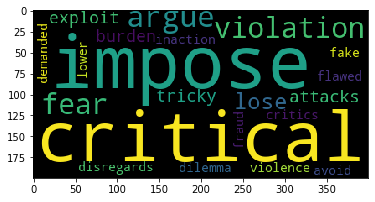

In [47]:
# word cloud for negative words
neg_words = ' '.join(neg_senti)
wc_neg = wc.generate(neg_words)
plt.imshow(wc_neg)

A clear scenario of negative outcome has been put into explanation when crucial information is let free into the hands of data aiming markets and the consequences of it when the same information slides into the international markets that not only effects an individual but the entire nation.
A syatem with no accountability, not only exposes preserved data but changes the intent that negatively impacts everyone.
Thus the terms impose , critical , argue, fear , violation , burden , exploit , fraud are having negative score.

#### Conclusion:
In this way, we can extract words that are most repeated in the document by vectorization and also classify the positive, neagtive and neutral terms using Sentiment analyser.